In [191]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from statistics import median
from statistics import mean
import cv2
from numpy import bitwise_xor
from statistics import mode
from scipy import stats as s
import glob
import numpy as np
import cv2
import sys
import math
import numpy
from numpy import round

In [49]:
loc = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P7/donald.jpg'
loc2 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P7/boris.jpg'

src = cv2.imread(loc, cv2.IMREAD_UNCHANGED ).astype(numpy.float32)/255.0
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

src2 = cv2.imread(loc2, cv2.IMREAD_UNCHANGED ).astype(numpy.float32)/255.0
src2 = cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)

In [52]:
def bilateral_filter( img_in, sigma_d, sigma_r, reg_constant=1e-8 ):


    gaussian = lambda r2, sigma: (numpy.exp( -0.5*r2/sigma**2 )*3).astype(int)*1.0/3.0

    win_width = int( 3*sigma_d+1 )
    wgt_sum = numpy.ones( img_in.shape )*reg_constant
    result  = img_in*reg_constant
    for shft_x in range(-win_width,win_width+1):
        for shft_y in range(-win_width,win_width+1):
            w = gaussian( shft_x**2+shft_y**2, sigma_d )
            off = numpy.roll(img_in, [shft_y, shft_x], axis=[0,1] )
            tw = w*gaussian( (off-img_in)**2, sigma_r )
            result += off*tw
            wgt_sum += tw
    return result/wgt_sum

In [45]:
trump = numpy.stack([ 
        bilateral_filter( src[:,:,0], 10.0, 0.1 ),
        bilateral_filter( src[:,:,1], 10.0, 0.1 ),
        bilateral_filter( src[:,:,2], 10.0, 0.1 )], axis=2 )

(-0.5, 899.5, 599.5, -0.5)

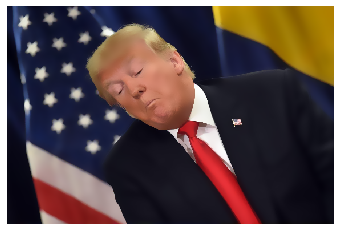

In [48]:
plt.imshow(trump)
plt.axis('off')

In [50]:
johnson = numpy.stack([ 
        bilateral_filter( src2[:,:,0], 10.0, 0.1 ),
        bilateral_filter( src2[:,:,1], 10.0, 0.1 ),
        bilateral_filter( src2[:,:,2], 10.0, 0.1 )], axis=2 )

(-0.5, 644.5, 508.5, -0.5)

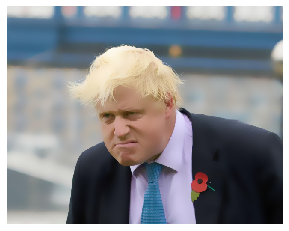

In [51]:
plt.imshow(johnson)
plt.axis('off')

In [226]:
gray_trump = []  
gray_trump = trump[:,:,0]*0.299 + trump[:,:,1]*0.587 + trump[:,:,2]*0.114
gray_johnson = []  
gray_johnson = johnson[:,:,0]*0.299 + johnson[:,:,1]*0.587 + johnson[:,:,2]*0.114

In [211]:
gray_trump = round((gray_trump + 1) * 255 / 2)

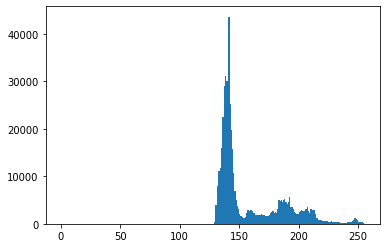

In [199]:
plt.hist(gray_trump.ravel(),256,[0,256])
plt.show()

In [222]:
x , y = gray_trump.shape
color_trump = np.zeros((x,y,3))
#gray_trump = np.array(img)
for i in range(x):
    for j in range(y):
        if gray_trump[i,j]<= 155:
            color_trump[i,j] = [0,48,80]
        elif 155<gray_trump[i,j]<= 175:
            color_trump[i,j] = [218,20,21]
        elif 175<gray_trump[i,j]<= 200:
            color_trump[i,j] = [112,150,160]
        elif 200<gray_trump[i,j]<= 255:
            color_trump[i,j] = [250,227,173]
        

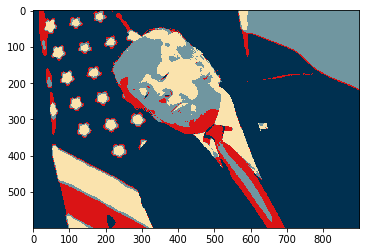

In [223]:
color_trump = np.array(color_trump,dtype = int)
plt.imshow(color_trump)

In [227]:
gray_johnson = round((gray_johnson + 1) * 255 / 2)

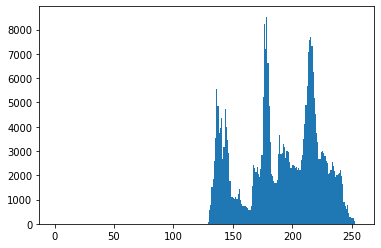

In [228]:
plt.hist(gray_johnson.ravel(),256,[0,256])
plt.show()

In [240]:
x , y = gray_johnson.shape
color_johnson = np.zeros((x,y,3))
for i in range(x):
    for j in range(y):
        if 0<gray_johnson[i,j]<= 162:
            color_johnson[i,j] = [0,48,80]
        elif 162<gray_johnson[i,j]<= 187:
            color_johnson[i,j] = [218,20,21]
        elif 187<gray_johnson[i,j]<= 210:
            color_johnson[i,j] = [250,227,173]
        elif 210<gray_johnson[i,j]<= 255:
            color_johnson[i,j] = [112,150,160]
        

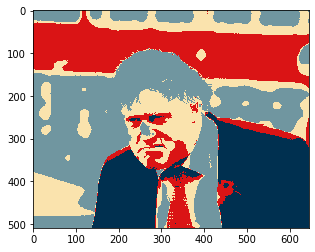

In [241]:
color_johnson = np.array(color_johnson,dtype = int)
plt.imshow(color_johnson)

In [242]:
mask_trump = np.array(Image.open('C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P7/donald_mask.png'))
mask_johnson = np.array(Image.open('C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P7/boris_mask.png'))

In [243]:
x , y = mask_trump.shape
for i in range(x):
    for j in range(y):
        if mask_trump[i,j] == 255 and j<= y//2:
            color_trump[i,j] = [112,150,160]
        elif mask_trump[i,j] == 255 and j > y//2:
            color_trump[i,j] = [218,20,21]

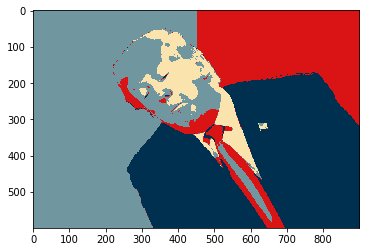

In [245]:
plt.imshow(color_trump)

In [246]:
x , y = mask_johnson.shape
for i in range(x):
    for j in range(y):
        if mask_johnson[i,j] == 255 and j<= y//2:
            color_johnson[i,j] = [112,150,160]
        elif mask_johnson[i,j] == 255 and j > y//2:
            color_johnson[i,j] = [218,20,21]

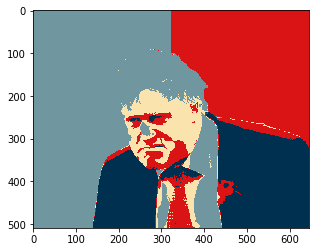

In [247]:
plt.imshow(color_johnson)